# Statewide Emissions EDA

## 0. Import Packages

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [2]:
ems_stwd = pd.read_csv('../data/CARB Emissions Data/statewide/all_em_statewide.csv')

In [3]:
ems_stwd

,src_type,category,subcategory,year,co,nh3,nox,pm,pm10,pm2_5,rog,sox,tog
0,STATIONARY,FUEL COMBUSTION,ELECTRIC UTILITIES,2000,87.747861,5.587486,66.249218,8.883160,8.273829,7.990296,5.250657,5.706011,33.335160
1,STATIONARY,FUEL COMBUSTION,COGENERATION,2000,47.060179,2.005656,29.043289,4.224099,3.518971,3.713187,2.968590,1.755844,16.221292
2,STATIONARY,FUEL COMBUSTION,OIL AND GAS PRODUCTION (COMBUSTION),2000,18.723581,0.038666,28.960639,1.984445,1.927553,1.971739,2.540201,7.423263,25.029807
3,STATIONARY,FUEL COMBUSTION,PETROLEUM REFINING (COMBUSTION),2000,10.252644,1.380193,47.006641,4.456122,4.229585,4.167303,1.821717,12.819814,3.961066
4,STATIONARY,FUEL COMBUSTION,MANUFACTURING AND INDUSTRIAL,2000,134.593068,2.884717,87.507772,7.047467,7.149462,6.960978,4.556243,17.840740,21.225969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,MOBILE,OTHER MOBILE SOURCES,FARM EQUIPMENT,2021,114.384736,0.071031,60.007085,3.557842,3.546327,3.245501,12.499444,0.078671,14.566349
1756,MOBILE,OTHER MOBILE SOURCES,FUEL STORAGE AND HANDLING,2021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.995429,0.000000,11.995430
1757,NATURAL (NON-ANTHROPOGENIC),NATURAL SOURCES,BIOGENIC SOURCES,2021,0.000000,14.533996,25.824091,0.000000,0.000000,0.000000,4770.894523,0.000000,5345.125001
1758,NATURAL (NON-ANTHROPOGENIC),NATURAL SOURCES,GEOGENIC SOURCES,2021,0.000000,61.794575,0.000000,0.000000,0.000000,0.000000,24.906147,0.000000,91.757860


## 2. EDA

### Prepare Data

In [4]:
# store values for potential plotting

#src_types = ems_stwd['src_type'].unique()
#cats = ems_stwd['category'].unique()
#subcats = ems_stwd['subcategory'].unique()
em_types = ['co', 'nh3', 'nox', 'pm', 'pm10', 'pm2_5', 'rog', 'sox', 'tog']

In [5]:
# melt separate emissions columns into 'em_type' for grouping, plotting
plotting_df = pd.melt(ems_stwd, id_vars=['src_type', 'category', 'subcategory', 'year'],
                      value_vars=em_types, var_name='em_type', value_name='tons_per_day')
plotting_df

,src_type,category,subcategory,year,em_type,tons_per_day
0,STATIONARY,FUEL COMBUSTION,ELECTRIC UTILITIES,2000,co,87.747861
1,STATIONARY,FUEL COMBUSTION,COGENERATION,2000,co,47.060179
2,STATIONARY,FUEL COMBUSTION,OIL AND GAS PRODUCTION (COMBUSTION),2000,co,18.723581
3,STATIONARY,FUEL COMBUSTION,PETROLEUM REFINING (COMBUSTION),2000,co,10.252644
4,STATIONARY,FUEL COMBUSTION,MANUFACTURING AND INDUSTRIAL,2000,co,134.593068
...,...,...,...,...,...,...
15835,MOBILE,OTHER MOBILE SOURCES,FARM EQUIPMENT,2021,tog,14.566349
15836,MOBILE,OTHER MOBILE SOURCES,FUEL STORAGE AND HANDLING,2021,tog,11.995430
15837,NATURAL (NON-ANTHROPOGENIC),NATURAL SOURCES,BIOGENIC SOURCES,2021,tog,5345.125001
15838,NATURAL (NON-ANTHROPOGENIC),NATURAL SOURCES,GEOGENIC SOURCES,2021,tog,91.757860


In [6]:
# read in population data for per capita analysis
pop_yearly = pd.read_csv('../data/FRED/CA_pop.csv')
pop_yearly.head()

,DATE,CAPOP
0,2000-01-01,33987.977
1,2001-01-01,34479.458
2,2002-01-01,34871.843
3,2003-01-01,35253.159
4,2004-01-01,35574.576


In [7]:
# convert date to year
pop_yearly['DATE'] = list(range(2000, 2022))

# convert population from thousands to ones
pop_yearly['CAPOP'] = pop_yearly['CAPOP'] * 1000

In [8]:
# rename columns
pop_yearly = pop_yearly.rename(columns={'DATE': 'year', 'CAPOP': 'population'})

In [9]:
# merge population into plotting df
plotting_df = pd.merge(plotting_df, pop_yearly)

In [10]:
plotting_df['TpDpCap'] = plotting_df['tons_per_day'] / plotting_df['population']
plotting_df

,src_type,category,subcategory,year,em_type,tons_per_day,population,TpDpCap
0,STATIONARY,FUEL COMBUSTION,ELECTRIC UTILITIES,2000,co,87.747861,33987977.0,2.581732e-06
1,STATIONARY,FUEL COMBUSTION,COGENERATION,2000,co,47.060179,33987977.0,1.384613e-06
2,STATIONARY,FUEL COMBUSTION,OIL AND GAS PRODUCTION (COMBUSTION),2000,co,18.723581,33987977.0,5.508884e-07
3,STATIONARY,FUEL COMBUSTION,PETROLEUM REFINING (COMBUSTION),2000,co,10.252644,33987977.0,3.016550e-07
4,STATIONARY,FUEL COMBUSTION,MANUFACTURING AND INDUSTRIAL,2000,co,134.593068,33987977.0,3.960020e-06
...,...,...,...,...,...,...,...,...
15835,MOBILE,OTHER MOBILE SOURCES,FARM EQUIPMENT,2021,tog,14.566349,39237836.0,3.712322e-07
15836,MOBILE,OTHER MOBILE SOURCES,FUEL STORAGE AND HANDLING,2021,tog,11.995430,39237836.0,3.057108e-07
15837,NATURAL (NON-ANTHROPOGENIC),NATURAL SOURCES,BIOGENIC SOURCES,2021,tog,5345.125001,39237836.0,1.362237e-04
15838,NATURAL (NON-ANTHROPOGENIC),NATURAL SOURCES,GEOGENIC SOURCES,2021,tog,91.757860,39237836.0,2.338505e-06


**Categories/Subcategories relevant to solar electricity production:**
- FUEL COMBUSTION: emissions from electricity production that could be replaced by solar
    - ELECTRIC UTILITIES
    - COGENERATION
- ON-ROAD MOTOR VEHICLES: emissions from mechanical power generation that could be replaced by solar-generated electricity
    -  ALL SUBCATEGORIES

In [11]:
# preview for plotting
plotting_df[plotting_df.em_type == 'co'].groupby('year')['tons_per_day'].sum().head()

year
2000    14253.817042
2001    14408.897741
2002    16472.034265
2003    15413.349634
2004    12072.745439
Name: tons_per_day, dtype: float64

### Overall Emissions

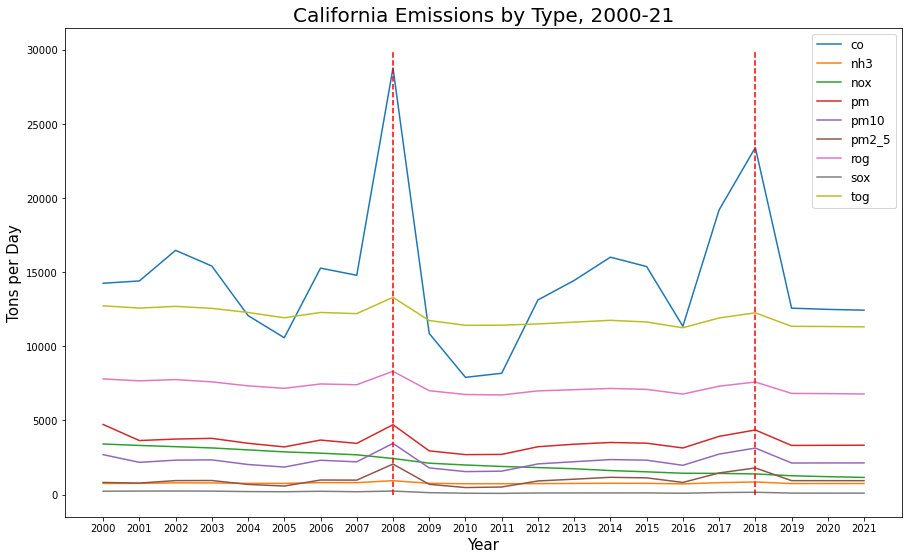

In [12]:
# California Emissions by Type, 2000-21
plt.figure(figsize=(15, 9))

for em in em_types:
    plt.plot(plotting_df[plotting_df.em_type == em].groupby('year')['tons_per_day'].sum(), label=em)
    
plt.vlines([2008, 2018], ymin=0, ymax=30_000, linestyles='dashed', colors='red')
plt.xticks(ticks=range(2000, 2022))
plt.ylabel('Tons per Day', fontdict={'fontsize': 15})
plt.xlabel('Year', fontdict={'fontsize': 15})
plt.title('California Emissions by Type, 2000-21', fontdict={'fontsize': 20})
plt.legend(fontsize=12);

Overall, total emissions are pretty flat over the last 20 years in California. However, wildfires are awful. Spikes in 2008, 2017/18 correspond to those being the three worst years on record (by total area burned) in California's history...until 2020 and 2021, which don't show up in the data because those years are just showing projections.

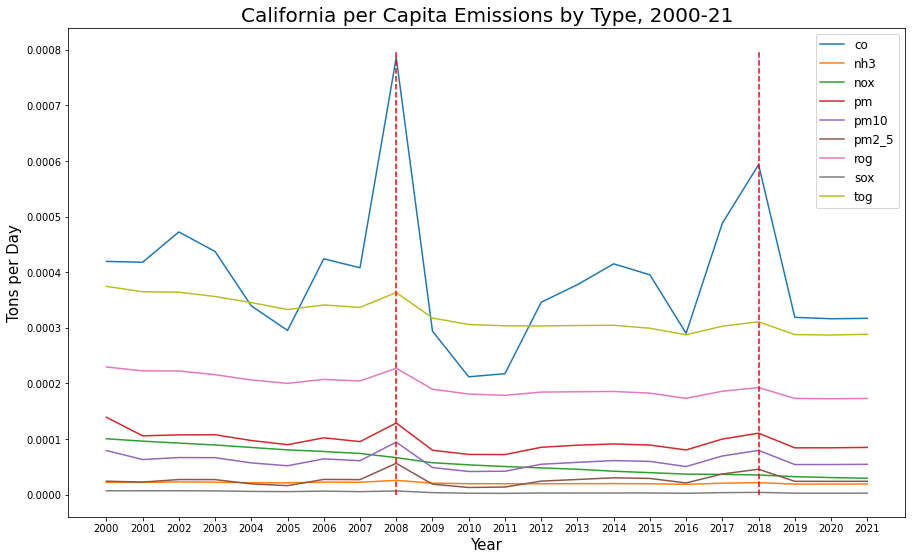

In [13]:
# California Per Capita Emissions by Type, 2000-21
plt.figure(figsize=(15, 9))

for em in em_types:
    plt.plot(plotting_df[plotting_df.em_type == em].groupby('year')['TpDpCap'].sum(), label=em)
    
plt.vlines([2008, 2018], ymin=0, ymax=.0008, linestyles='dashed', colors='red')
plt.xticks(ticks=range(2000, 2022))
plt.ylabel('Tons per Day', fontdict={'fontsize': 15})
plt.xlabel('Year', fontdict={'fontsize': 15})
plt.title('California per Capita Emissions by Type, 2000-21', fontdict={'fontsize': 20})
plt.legend(fontsize=12);

Emissions per capita are generally on a slightly downward trend. Progress!

### Source-specific Emissions

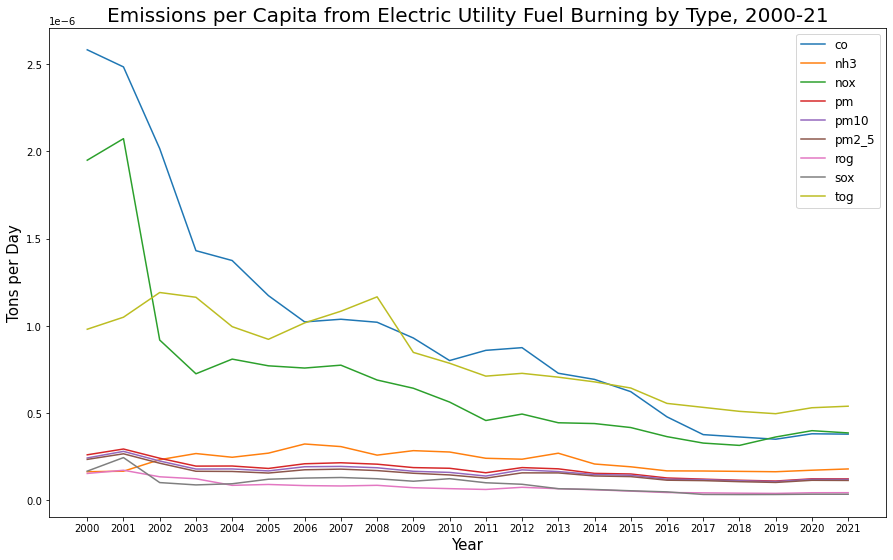

In [14]:
# Emissions per Capita from Electric Utility Fuel Burning by Type, 2000-2021
plt.figure(figsize=(15, 9))

for em in em_types:
    plt.plot(plotting_df[(plotting_df.em_type == em) & (plotting_df.subcategory == 'ELECTRIC UTILITIES')].groupby('year')['TpDpCap'].sum(), label=em)
    
plt.xticks(ticks=range(2000, 2022))
plt.ylabel('Tons per Day', fontdict={'fontsize': 15})
plt.xlabel('Year', fontdict={'fontsize': 15})
plt.title('Emissions per Capita from Electric Utility Fuel Burning by Type, 2000-21', fontdict={'fontsize': 20})
plt.legend(fontsize=12);

Generally a downward trend from electric utility fuel burning across emissions types, especially and importantly CO. Ammonia, however, has increased a bit.

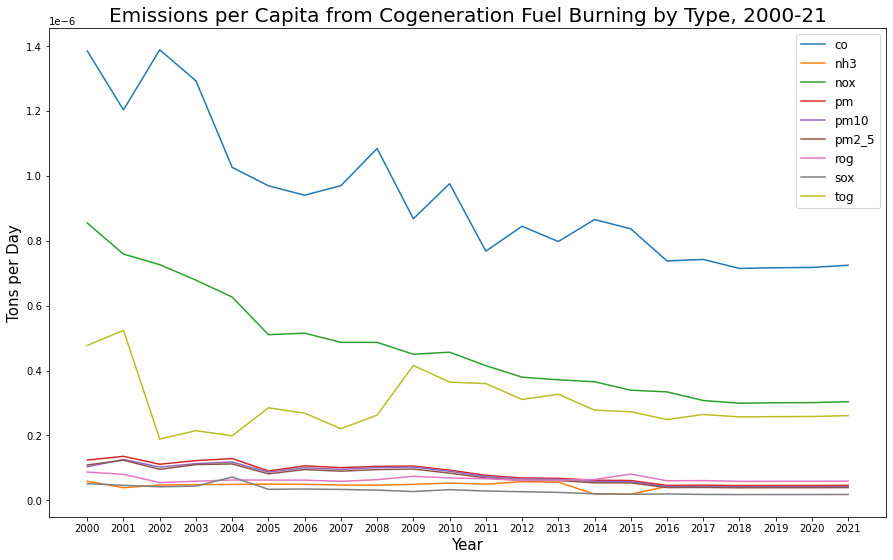

In [15]:
# Emissions per Capita from Cogeneration Fuel Burning by Type, 2000-2021
plt.figure(figsize=(15, 9))

for em in em_types:
    plt.plot(plotting_df[(plotting_df.em_type == em) & (plotting_df.subcategory == 'COGENERATION')].groupby('year')['TpDpCap'].sum(), label=em)
    
plt.xticks(ticks=range(2000, 2022))
plt.ylabel('Tons per Day', fontdict={'fontsize': 15})
plt.xlabel('Year', fontdict={'fontsize': 15})
plt.title('Emissions per Capita from Cogeneration Fuel Burning by Type, 2000-21', fontdict={'fontsize': 20})
plt.legend(fontsize=12);

General downward trend in emissions from cogeneration.

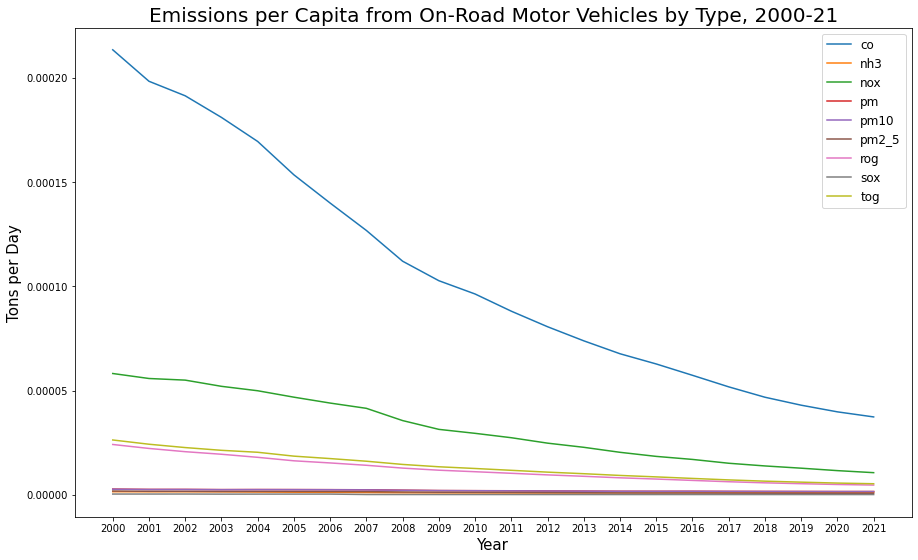

In [16]:
# Emissions per Capita from On-Road Motor Vehicles by Type, 2000-2021
plt.figure(figsize=(15, 9))

for em in em_types:
    plt.plot(plotting_df[(plotting_df.em_type == em) & (plotting_df.category == 'ON-ROAD MOTOR VEHICLES')].groupby('year')['TpDpCap'].sum(), label=em)
    
plt.xticks(ticks=range(2000, 2022))
plt.ylabel('Tons per Day', fontdict={'fontsize': 15})
plt.xlabel('Year', fontdict={'fontsize': 15})
plt.title('Emissions per Capita from On-Road Motor Vehicles by Type, 2000-21', fontdict={'fontsize': 20})
plt.legend(fontsize=12);

Strong reduction (>75%) in CO emissions per capita from on-road motor vehicles. Likely the result of more hybrid and electric vehicles, though impact of public transit use patterns is unknown.

### Correlation

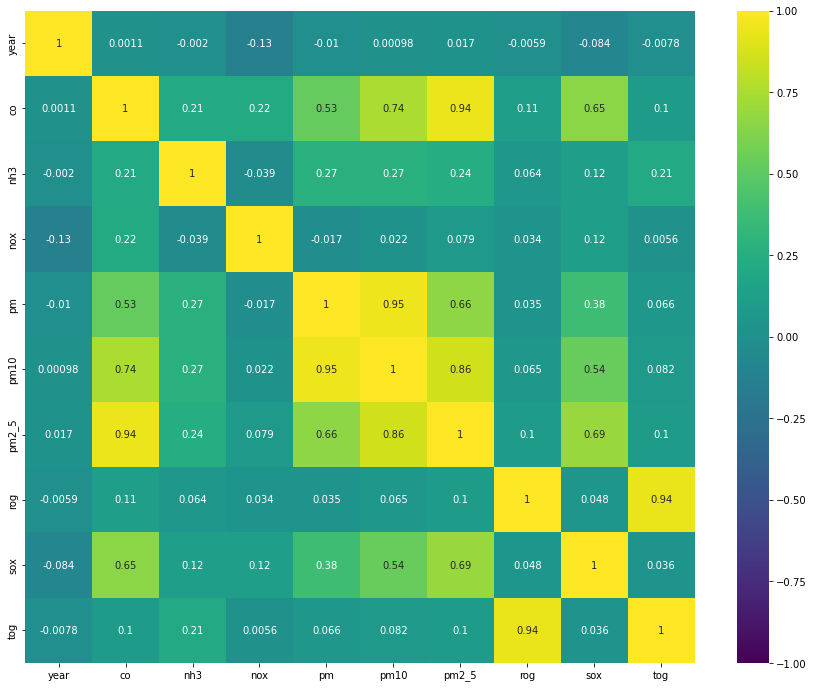

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(ems_stwd.corr(), cmap='viridis', annot=True, vmin=-1);

Note: These are within-source correlations, since each observation is specific to a subcategory of emitter.

Notable Correlations:
- It's no surprise that the PM types are strongly correlated, as are TOG and ROG, since these classifications are related to each other as subsets.
- Similarly, the PM's contain significant amounts of sulfur oxides such as SO$_4$$^2$$^-$, as well as ammonium (NH$_4$$^-$), so correlations between SOX, NH3 and the PM's make sense.
- The signs of year correlations show overall increase vs. decrease in each emission over time. We see most notably an increase in PM 2.5 and a decrease in oxides of nitrogen and sulfur.
- The correlation between PM 2.5 and CO is extremely high, suggesting that these emissions, which are among the most harmful to human health, are generally emitted together. There is also a fairly strong correlation between sulfur oxides and CO.

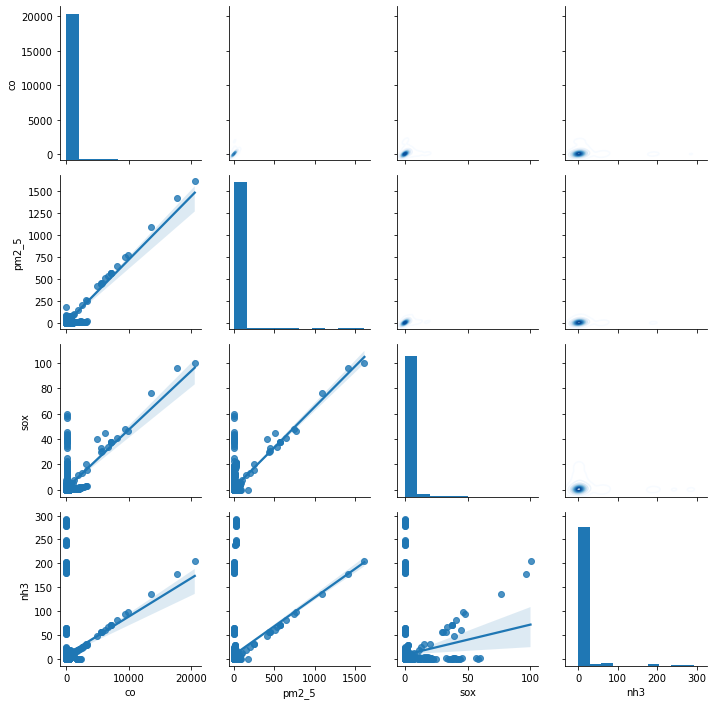

In [18]:
sns.PairGrid(ems_stwd[['co', 'pm2_5', 'sox', 'nh3']]).map_lower(sns.regplot).map_upper(sns.kdeplot, cmap='Blues').map_diag(plt.hist);

I chose to focus on these four types of emission because they seem to present the most meaningful correlations. This pairplot shows several interesting things about their distributions:
- All distributions are zero-weighted, since many of the emissions sources in the data produce none or very little of certain emissions.
- CO and PM 2.5 show the strongest correlation, in particular because there are relatively few instances of one being produced in large amounts without the other.
- CO is somewhat decoupled from SOX and NH3, since we can see many sources producing these without producing much (or any) CO. This is also true for PM 2.5.
- The weakest correlation is between SOX and NH3. There are many instances of one being produced in large amounts with little or none of the other.
- For couples not included here, we should expect graphs similar to that of SOX vs. NH3, in which there are many observations for which each emission is produced in significant amount without much of the other.